# k-means clustering

In [4]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
#from sklearn.cluster import KMeans

In [13]:
class _KMeans:

    def __init__(self, n_clusters=8, init='k-means++', max_iter=300):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.x = None
        self.cluster_centers_ = None
        self.cluster_centers_old_ = None
        self.labels_ = None

    def fit(self, x):
        iter = 0
        self.x = np.array(x)

        # Step 0
        if self.init == 'k-means++':
            x_pool = self.x.copy()  # init pool of centroids
            c = np.random.randint(len(x_pool))  # first random index
            self.cluster_centers_ = np.array([x_pool[c]])  # assign centroid
            x_pool = np.delete(x_pool, c, axis=0) # remove that centroid from the pool

            # remaining centroids
            while len(self.cluster_centers_) < self.n_clusters:
                # calculated distances and probabilities (max dist -> larger prob)
                d = np.sqrt(((x_pool - self.cluster_centers_[:, np.newaxis]) ** 2).sum((2, 0)).T)
                p = d / sum(d ** 2)

                # picking the best centroid from the pool
                centroid = random.choices(range(len(p)), p)[0]
                self.cluster_centers_ = np.append(self.cluster_centers_, [x_pool[centroid]], axis=0)
                x_pool = np.delete(x_pool, centroid, axis=0)

        else:  # pick n random centroids
            self.cluster_centers_ = \
                np.array([self.x[i] for i in random.sample(
                    range(len(self.x)), self.n_clusters)])

        # K-Means

        while not np.array_equal(self.cluster_centers_old_, self.cluster_centers_) and iter < self.max_iter:
            self.cluster_centers_old_ = self.cluster_centers_.copy()
            # print('Iteration: ' + str(iter + 1) + '; ', *self.cluster_centers_)
            iter += 1

            # Step 1
            # squared distance -> sum x dimensions and centroids -> transpose (clusters in row)
            # d = [[np.sqrt(sum(np.power(i - c, 2))) for c in self.cluster_centers_] for i in self.x]
            d = np.sqrt(((self.x - self.cluster_centers_[:, np.newaxis]) ** 2).sum(2).T)
            # indexes of min values (grouped by column)
            self.labels_ = np.argmin(d, axis=1)

            # Step 2
            centroids = []
            for c in range(self.n_clusters):
                x = np.array([self.x[li] for li, lc in enumerate(self.labels_) if lc == c])
                # centroids.append([sum(i) / len(i) for i in x.T])
                centroids.append(x.mean(0)) # calculate mean for each cluster x's
            self.cluster_centers_ = np.array(centroids)

        return self

## Sample Demonstration

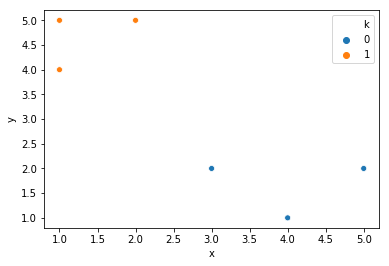

In [17]:
x = pd.DataFrame({
    'x': [1, 2, 1, 3, 5, 4],
    'y': [5, 5, 4, 2, 2, 1]
})
x['k'] = _KMeans(n_clusters=2).fit(x).labels_
sns.scatterplot(x=x['x'], y=x['y'], hue=x['k'])
plt.show()

## Iris Flowers

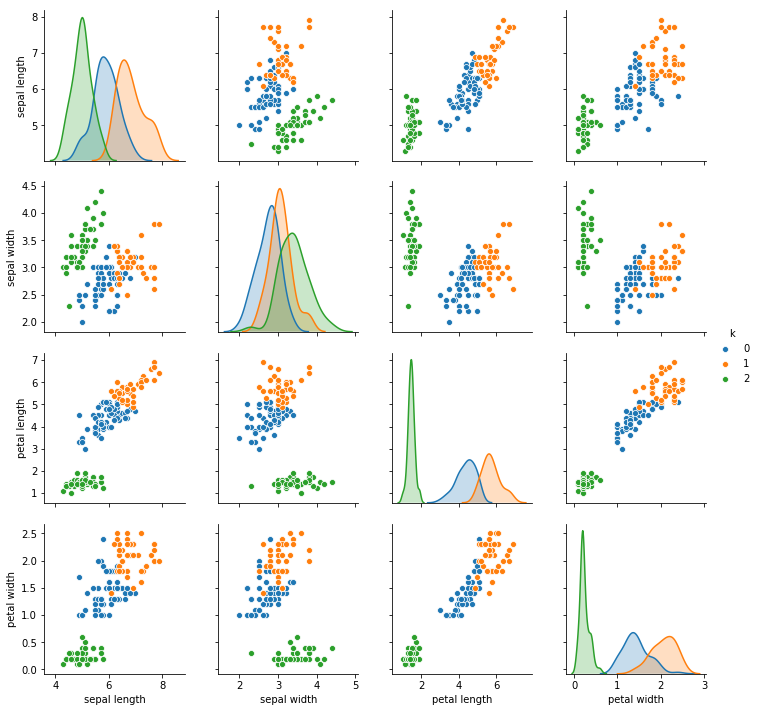



class            k
Iris-setosa      2    50
Iris-versicolor  0    48
                 1     2
Iris-virginica   0    14
                 1    36
dtype: int64

class
Iris-setosa        50
Iris-versicolor    48
Iris-virginica     36
dtype: int64

Accuracy:  134 / 150 = 89.0 %


In [22]:
x = pd.read_csv('datasets/iris.data.csv')
x['k'] = _KMeans(n_clusters=3).fit(
    x[['sepal length', 'sepal width', 'petal length', 'petal width']]).labels_

sns.pairplot(x, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='k')
# sns.pairplot(X, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='class')
plt.show()

size_of_k = x.iloc[:, [4, 5]].groupby(['class', 'k']).size()
max_by_class = size_of_k.groupby(['class']).max()

print('\n')
print(size_of_k, end='\n\n')
print(max_by_class, end='\n\n')
print('Accuracy: ', str(max_by_class.sum()), '/', len(x), '=',
      str(round((max_by_class.sum() / len(x)), 2) * 100), '%')

## Image compression

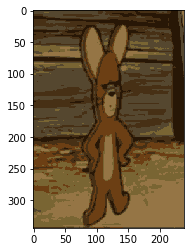

In [40]:
x = imageio.imread('datasets/image.jpg')
k = _KMeans(n_clusters=6).fit(np.reshape(x, (-1, 3)))
c = list(map((lambda y: k.cluster_centers_[y].astype(int)), k.labels_))
plt.imshow(np.reshape(c, x.shape))
plt.show()